In [68]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [69]:
california_housing=fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [70]:
cahouse_df = california_housing.frame
cahouse_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [71]:
cahouse_df.shape

(20640, 9)

In [72]:
cahouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [73]:
# features=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
X= california_housing.data
y=cahouse_df['MedHouseVal']

In [74]:
print(X.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, train_size=0.2, random_state=513)

In [76]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_preds = linear_model.predict(X_test)

linear_mae = mean_absolute_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)



In [77]:
print(f'The mean absolute error using linear regression is: {linear_mae}')
print(f'The r2 score using linear regression is: {linear_r2}')

The mean absolute error using linear regression is: 0.5303314827292182
The r2 score using linear regression is: 0.5976807909849114


In [78]:
from sklearn.ensemble import RandomForestRegressor

def get_mae_r2(max_leaf_nodes, X_train, X_test, y_train, y_test):
    forest_model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=52)
    forest_model.fit(X_train, y_train)
    forest_preds = forest_model.predict(X_test)
    forest_mae = mean_absolute_error(y_test, forest_preds)
    forest_r2 = r2_score(y_test, forest_preds)
    return forest_mae, forest_r2

In [79]:
for max_leaf_nodes in [5, 10, 100, 500, 1000, 5000]:
    my_mae_r2 = get_mae_r2(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(f'Max leaf nodes: {max_leaf_nodes} \t \t Mean Abs Error: {my_mae_r2[0]} \t \t r2: {my_mae_r2[1]}' )

Max leaf nodes: 5 	 	 Mean Abs Error: 0.6100418565956357 	 	 r2: 0.510870177085297
Max leaf nodes: 10 	 	 Mean Abs Error: 0.5464862808232408 	 	 r2: 0.5908131305902279
Max leaf nodes: 100 	 	 Mean Abs Error: 0.41875539480103785 	 	 r2: 0.7262185226408339
Max leaf nodes: 500 	 	 Mean Abs Error: 0.38331717868989335 	 	 r2: 0.7555017250380764
Max leaf nodes: 1000 	 	 Mean Abs Error: 0.3797217377636345 	 	 r2: 0.7579148070714219
Max leaf nodes: 5000 	 	 Mean Abs Error: 0.3792094638384207 	 	 r2: 0.758223216750213


RandomForestRegression with 1000 leaf nodes performed slightly better than the linear regression model. The MAE is smaller and r2 is a better fit than the results from the linear regression.

In [82]:
forest_1000 = RandomForestRegressor(max_leaf_nodes=1000, random_state=52)
forest_1000.fit(X_train,y_train)
forest_1000_preds = forest_1000.predict(X_test)
forest_1000_mae = mean_absolute_error(y_test, forest_1000_preds)
forest_1000_r2 = r2_score(y_test, forest_1000_preds)

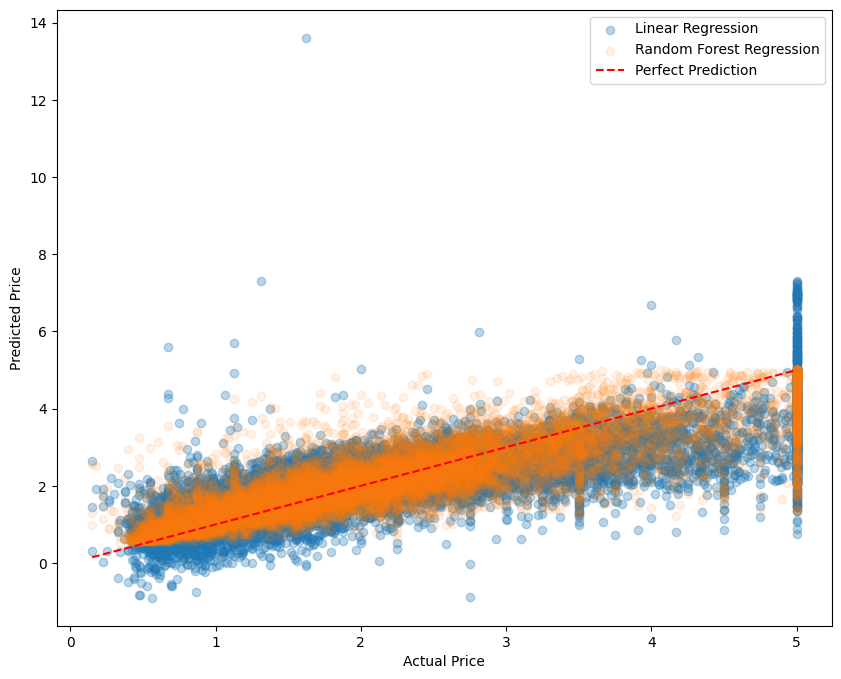

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(y_test, linear_preds, alpha=0.3, label='Linear Regression')
plt.scatter(y_test, forest_1000_preds, alpha=0.1, label='Random Forest Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


After including all features, excluding MedHouseVal, the RandomForest model performed much better than the linear model. As seen in the figure above, there is a tighter spread around the true prediction values for the random forest predictions while the linear ones had a wider spread. Linear regression model also had many more outliers with one being predicted to be 14.